In [163]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import TensorDataset, DataLoader

import os
from PIL import Image #to operate on pics or images
from IPython.display import display #Only for Jupyter Notebook
import warnings
warnings.filterwarnings('ignore')


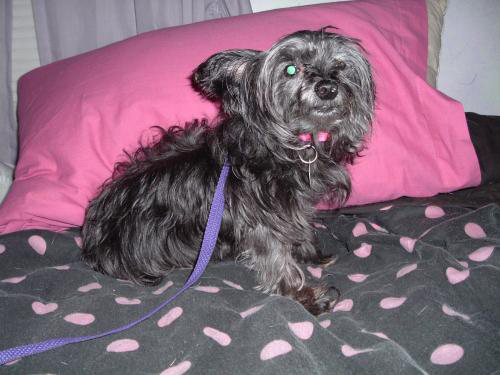

The image size is (500, 375)
The pixel value at the coordinates 0,0 of the above image is (117, 115, 126)


In [164]:
with Image.open(r'/Users/mihikamishra/Desktop/Output/train/Dog/0.jpg') as im:
    display (im)
    print(f'The image size is {im.size}') #to know the size of the image
    print(f'The pixel value at the coordinates 0,0 of the above image is {im.getpixel((0,0))}')
    # to get the pixel value at the coordinates 0,0 in the image which wil


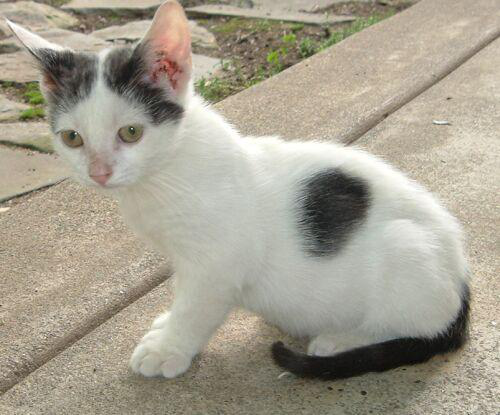

The image size is (500, 415)


In [165]:
with Image.open(r'/Users/mihikamishra/Desktop/Output/train/Cat/3.jpg') as im:
    display (im)
    print(f'The image size is {im.size}') #to know the size of the image


In [166]:
path= "/Users/mihikamishra/Desktop/Output"
img_names= []

for folder,subfolder,filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+'/'+img)


In [167]:
len(img_names)  #total number of images in the list


22502

In [168]:
img_names[0:5]

['/Users/mihikamishra/Desktop/Output/.DS_Store',
 '/Users/mihikamishra/Desktop/Output/test/Cat/9733.jpg',
 '/Users/mihikamishra/Desktop/Output/test/Cat/12250.jpg',
 '/Users/mihikamishra/Desktop/Output/test/Cat/6366.jpg',
 '/Users/mihikamishra/Desktop/Output/test/Cat/6414.jpg']

In [169]:
img_sizes = []
rejected = []

for item in img_names:
    try:
        with Image.open(item) as img:
            img_sizes.append(img.size)
            
    except:
        rejected.append(item)

In [170]:
len(img_sizes)

22498

In [171]:
rejected

['/Users/mihikamishra/Desktop/Output/.DS_Store',
 '/Users/mihikamishra/Desktop/Output/train/.DS_Store',
 '/Users/mihikamishra/Desktop/Output/train/Cat/Thumbs.db',
 '/Users/mihikamishra/Desktop/Output/train/Dog/Thumbs.db']

In [172]:
df= pd.DataFrame(img_sizes,columns=['width','height'])

In [173]:
df.head()

,width,height
0,365,500
1,480,500
2,500,375
3,380,500
4,500,375


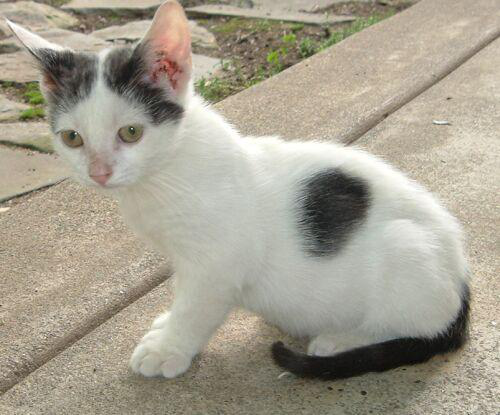

In [174]:
cat = Image.open(r'/Users/mihikamishra/Desktop/Output/train/Cat/3.jpg')
display(cat)

In [175]:
cat.size # to get the size of the picture

(500, 415)

In [176]:
cat.getpixel((0,0))#to get the pixel value at the coordinates 0,0

(161, 155, 143)

In [177]:
modify = transforms.Compose( [
    transforms.ToTensor()  #first transformation -- to convert it into tensor array
] )  

#we can use the compose method to pass series of transformations as a list on to the image instead of applying it one by one

In [178]:
tensor_pic = modify(cat) # pass the image file through this function to do the transformation
#use .cuda() fuction at the end to insitansiate the tensor in the GPU instead of CPU and follow the same whenever we create
#a tensor

In [179]:
tensor_pic

tensor([[[0.6314, 0.6510, 0.6627,  ..., 0.7216, 0.7176, 0.7137],
         [0.5059, 0.5216, 0.5373,  ..., 0.7176, 0.7137, 0.7098],
         [0.5020, 0.5176, 0.5373,  ..., 0.7137, 0.7098, 0.7059],
         ...,
         [0.6980, 0.7059, 0.6784,  ..., 0.7686, 0.5451, 0.4824],
         [0.7098, 0.7529, 0.6353,  ..., 0.7765, 0.5569, 0.5765],
         [0.6471, 0.8157, 0.7412,  ..., 0.5961, 0.4510, 0.5765]],

        [[0.6078, 0.6196, 0.6314,  ..., 0.6784, 0.6745, 0.6706],
         [0.4745, 0.4902, 0.5059,  ..., 0.6706, 0.6667, 0.6627],
         [0.4706, 0.4863, 0.5059,  ..., 0.6667, 0.6627, 0.6588],
         ...,
         [0.6588, 0.6667, 0.6392,  ..., 0.7608, 0.5373, 0.4745],
         [0.6706, 0.7137, 0.5961,  ..., 0.7647, 0.5451, 0.5647],
         [0.6078, 0.7765, 0.7020,  ..., 0.5804, 0.4353, 0.5608]],

        [[0.5608, 0.5765, 0.5882,  ..., 0.6078, 0.6039, 0.6000],
         [0.4314, 0.4471, 0.4627,  ..., 0.6078, 0.6039, 0.6000],
         [0.4196, 0.4353, 0.4549,  ..., 0.6039, 0.6000, 0.

In [180]:
type(tensor_pic)

torch.Tensor

In [181]:
tensor_pic.shape

torch.Size([3, 415, 500])

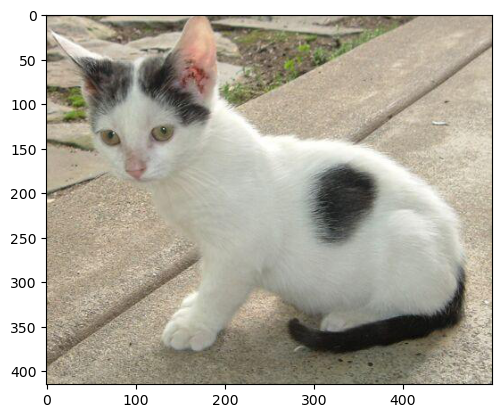

In [182]:
plt.imshow(np.transpose(tensor_pic.numpy(),(1,2,0)))

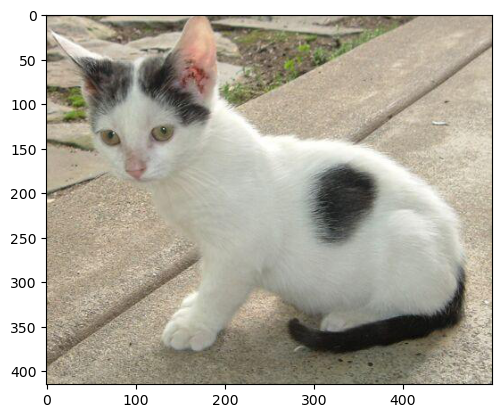

In [183]:
modify = transforms.Compose( [transforms.ToTensor()] ) 
tensor_pic = modify(dog)
plt.imshow(np.transpose(tensor_pic.numpy(),(1,2,0)))

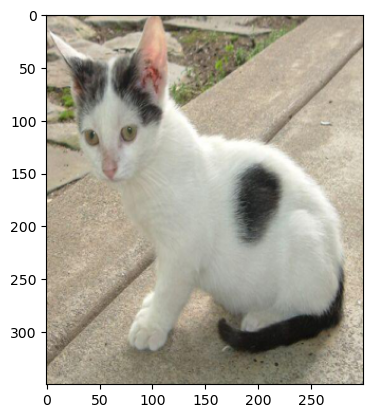

In [184]:
modify = transforms.Compose( [
    transforms.Resize( (350,300)), # first transformation  -- to resize the image
    transforms.ToTensor()            # second transformation -- to convert it into tensor array
] )  

#we can use the compose method to pass series of transformations as a list on to the image instead of applying it one by one
tensor_pic= modify(dog)
plt.imshow(np.transpose(tensor_pic.numpy(),(1,2,0)))

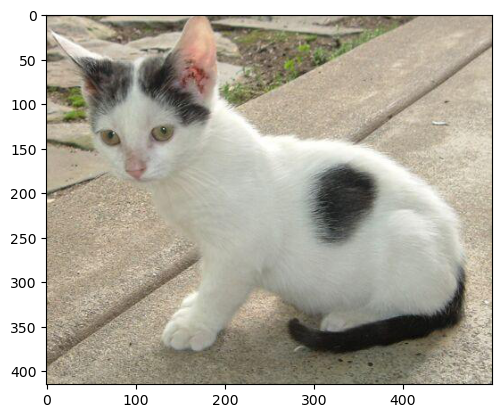

In [185]:
modify = transforms.Compose( [transforms.ToTensor()] ) 
tensor_pic = modify(dog)
plt.imshow(np.transpose(tensor_pic.numpy(),(1,2,0)))

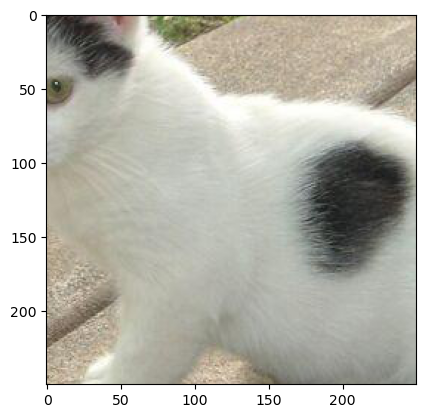

In [186]:
modify = transforms.Compose( [
    transforms.CenterCrop(250),      # first transformation  -- to crop the image at center of dim 250X250
    transforms.ToTensor()            # second transformation -- to convert it into tensor array
] )  

#we can use the compose method to pass series of transformations as a list on to the image instead of applying it one by one
tensor_pic= modify(dog)
plt.imshow(np.transpose(tensor_pic.numpy(),(1,2,0)))

In [187]:
from torchvision import datasets, transforms

In [188]:
# TRAINING DATA TRANSFORMATION
train_transform =transforms.Compose( [
    transforms.RandomHorizontalFlip(),     # Frist transformation -- flip horizontally  
    transforms.RandomRotation(degrees = 30),  # Second transformation  -- to rotate the image to 30 degrees
    transforms.Resize( (224)),                # Third transformation --Resize to 224 as the mean in the describe function above
    transforms.CenterCrop(224) ,              # Fourth transformation --Cropping at the center by 250x250   
    transforms.ToTensor(),                     # Fifth transformation -- to convert it into tensor array (make sure the tensor converion is at the last step)
    transforms.Normalize( [0.485,0.456,0.406],[0.229,0.224,0.225]) # Sixth transformation -- normalize the data to the specified mean and std dev

] ) 

In [189]:
# TESTING DATA TRANSFORMATION
test_transform =transforms.Compose( [
    transforms.Resize( (224)),                # First transformation --Resize to 224 as the mean in the describe function above
    transforms.CenterCrop(224) ,              # Second transformation --Cropping at the center by 250x250   
    transforms.ToTensor(),                    # Third transformation -- to convert it into tensor array (make sure the tensor converion is at the last step)
    transforms.Normalize( [0.485,0.456,0.406],[0.229,0.224,0.225]) # Fourth transformation -- normalize the data to the specified mean and std dev

] ) 

In [190]:
root = r'/Users/mihikamishra/Desktop/Output'

In [191]:
train_data = datasets.ImageFolder(os.path.join(root,'train'),transform= train_transform)
test_data  = datasets.ImageFolder(os.path.join(root,'test'),transform = test_transform)

In [192]:
train_data

Dataset ImageFolder
    Number of datapoints: 19996
    Root location: /Users/mihikamishra/Desktop/Output/train
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
               Resize(size=224, interpolation=bilinear, max_size=None, antialias=warn)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [193]:
type(train_data)

torchvision.datasets.folder.ImageFolder

In [194]:
test_data

Dataset ImageFolder
    Number of datapoints: 2502
    Root location: /Users/mihikamishra/Desktop/Output/test
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear, max_size=None, antialias=warn)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [195]:
image, label = train_data[0]
print('Shape:', image.shape, '\nLabel:', label)

Shape: torch.Size([3, 224, 224]) 
Label: 0


In [196]:
image, label = test_data[0]
print('Shape:', image.shape, '\nLabel:', label)

Shape: torch.Size([3, 224, 224]) 
Label: 0


In [197]:
class_names= train_data.classes #as we loaded from the folder structure, the names will be stored as classes
class_names

['Cat', 'Dog']

Label: [    0     0     1     0     0     0     0     0     1     0]
Class:  Cat Cat Dog Cat Cat Cat Cat Cat Dog Cat


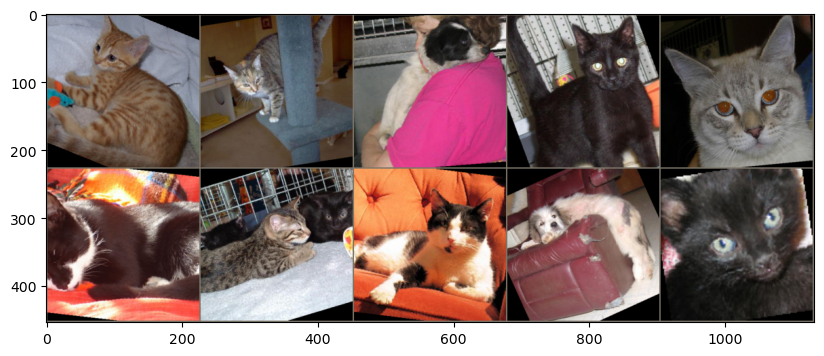

In [198]:
np.set_printoptions(formatter=dict(int=lambda x: f'{x:5}')) # to widen the printed array
from torchvision.utils import make_grid
# Grab the first  10 images from the first batch of training data
for images,labels in train_loader: 
    break

# Print the labels
print('Label:', labels.numpy())
print('Class: ', *np.array([class_names[i] for i in labels]))

# Print the images
im = make_grid(images, nrow=5)  # the default nrow is 8

inv_normalize = transforms.Normalize(mean= [ -0.485/0.229 , -0.456/0.224,-0.406/0.225 ], std=[1/0.229, 1/0.224,1/0.225])
im_inv = inv_normalize(im)
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(), (1, 2, 0)));

In [199]:
from torch.utils.data import TensorDataset, DataLoader

In [200]:
"""
Initializing train/test dataloader object which splits the training/testing datasets into small batches of 10 images each
and this can be used later in the CNN model  
"""
torch.manual_seed(101)
bat_sz=10
train_loader = DataLoader(train_data,batch_size=bat_sz,shuffle=True)  #use pin_memory=True in the parameters after shuffle to change to cuda
test_loader = DataLoader(test_data,batch_size=bat_sz,shuffle=False)   #use pin_memory=True in the parameters after shuffle to change to cuda

In [201]:
class CONVNN(nn.Module):
    
    def __init__(self):
        
        super().__init__()
        self.conv1  = nn.Conv2d(3, 10 , kernel_size =5, stride=1,padding=2)#3 color channels as input and We will be using 5X5 filter/kernel and stride of 1 without any padding 
        self.conv2  = nn.Conv2d(10, 16, 5 , 1,padding=2)
        self.layer1 = nn.Linear(56*56*16,120) # we need to calculate the resulting number of matrices passing thru the conv layer and put that corressponding o/p as the linear layer input
        self.layer2 = nn.Linear(120,84)
        self.layer3 = nn.Linear(84,2) #only 2 classes of Dogs and Cats
        
    def forward(self,x):
        
        x= F.max_pool2d(  F.relu(self.conv1(x)) , 2, 2) #adding relu and max pooling with 2x2 kernel and stride of 2
        x= F.max_pool2d(  F.relu(self.conv2(x)) , 2, 2) #adding relu and max pooling the same line
        x= F.relu(      self.layer1(  x.view(-1,56*56*16)   ))       #flattening by using View and no dropout has been added
        x= F.relu(self.layer2(x))
        x= F.log_softmax(  self.layer3(x), dim=1)          #Binary class classificaiton
        
        return x
    

In [202]:
torch.manual_seed(101)
model = CONVNN()  #to instansiate the model as cuda use "model = CONVNN().to(device) " or "model.cuda()" so that whatever the tensors we are passing to the model will be saved in GPU and operations will be performed on that
model

CONVNN(
  (conv1): Conv2d(3, 10, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(10, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (layer1): Linear(in_features=50176, out_features=120, bias=True)
  (layer2): Linear(in_features=120, out_features=84, bias=True)
  (layer3): Linear(in_features=84, out_features=2, bias=True)
)

In [203]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [204]:
epochs = 20
train_loss= []
test_loss= []
train_acc=[]
test_acc = []

print(f'\nConvolutional Neural Network Model Metrics:\n')
print(f'\t This CNN model configuration has {epochs} epochs with each batch size of {bat_sz} images:\n')
for i in range(epochs):
    
    train_crt_pred = 0
    test_crt_pred = 0
    conf_mat= torch.FloatTensor([])
    
    for b,(x_train,y_train) in enumerate (train_loader):
        b += 1
        y_pred = model.forward(x_train)
        loss= criterion(y_pred,y_train)
        
        buffer = torch.max(y_pred.data, 1) [1]
        batch_acc = (buffer == y_train).sum()
        train_crt_pred +=  batch_acc
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
                
        if b%  int((len(train_data)/bat_sz)/5 )  == 0:
            print(f'Epoch{i+1:2} Batch {b:4} loss: {loss.item():5.2f} Train Accuracy: {train_crt_pred.item()*100/(bat_sz*b):6.3f}%')
    
    train_loss.append(loss)  #loss after 1 epoch
    train_acc.append(train_crt_pred) # crt predictions after 1 epoch
    
    
    with torch.no_grad():  #testing after 1 complete epoch
        for b,(x_test,y_test) in enumerate (test_loader):
            b += 1
            y_eval = model(x_test)
            loss= criterion(y_eval,y_test)
            buffer1 = torch.max(y_eval.data, 1) [1]
            conf_mat =  torch.cat((conf_mat.float(),buffer1.float()),0)
            batch_acc = (buffer1 == y_test).sum()
            test_crt_pred +=  batch_acc
    
    test_loss.append(loss) #test loss after the last completed epoch
    test_acc.append(test_crt_pred) # crt predictions using the last completed epoch

    print(f'After {i+1} Epoch(s) the Train Accuracy is {(train_crt_pred.item()/len(train_data))*100:6.3f}% and Test Accuracy is {(test_crt_pred.item()/len(test_data))*100:6.3f}% \n')     
    
        


Convolutional Neural Network Model Metrics:

	 This CNN model configuration has 20 epochs with each batch size of 10 images:

Epoch 1 Batch  399 loss:  0.73 Train Accuracy: 50.852%
Epoch 1 Batch  798 loss:  0.65 Train Accuracy: 51.830%
Epoch 1 Batch 1197 loss:  0.60 Train Accuracy: 54.444%
Epoch 1 Batch 1596 loss:  0.62 Train Accuracy: 56.435%
Epoch 1 Batch 1995 loss:  0.64 Train Accuracy: 58.075%
After 1 Epoch(s) the Train Accuracy is 58.082% and Test Accuracy is 68.865% 

Epoch 2 Batch  399 loss:  0.46 Train Accuracy: 67.970%
Epoch 2 Batch  798 loss:  0.61 Train Accuracy: 68.296%
Epoch 2 Batch 1197 loss:  0.56 Train Accuracy: 68.521%
Epoch 2 Batch 1596 loss:  0.57 Train Accuracy: 69.060%
Epoch 2 Batch 1995 loss:  0.61 Train Accuracy: 69.880%
After 2 Epoch(s) the Train Accuracy is 69.874% and Test Accuracy is 73.661% 

Epoch 3 Batch  399 loss:  0.83 Train Accuracy: 73.709%
Epoch 3 Batch  798 loss:  0.26 Train Accuracy: 73.546%
Epoch 3 Batch 1197 loss:  0.41 Train Accuracy: 73.876%
Ep

In [205]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

In [206]:
torch.Tensor([r for q,r in test_data])

tensor([0., 0., 0.,  ..., 1., 1., 1.])


The Confusion Matrix is plotted below:


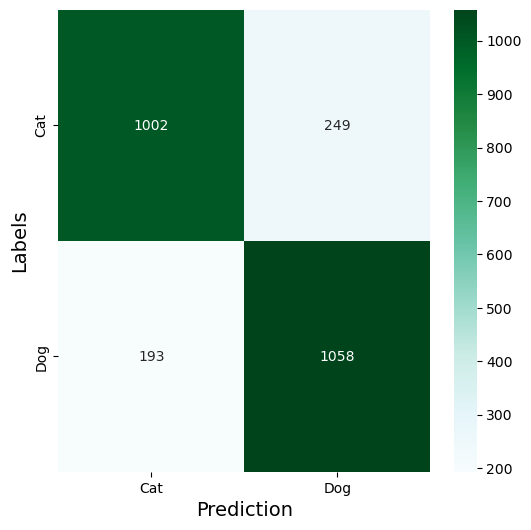


The Classification Report is plotted below: 

               precision    recall  f1-score   support

         0.0       0.84      0.80      0.82      1251
         1.0       0.81      0.85      0.83      1251

    accuracy                           0.82      2502
   macro avg       0.82      0.82      0.82      2502
weighted avg       0.82      0.82      0.82      2502



In [207]:
print('\nThe Confusion Matrix is plotted below:')
cfmt =pd.DataFrame(confusion_matrix(torch.Tensor([r for q,r in test_data]).reshape(-1,1),conf_mat.reshape(-1,1),labels=[0,1]),index=class_names,columns=class_names)
plt.figure(figsize=(6,6))
sns.heatmap(cfmt,annot=True,cmap='BuGn',fmt="d")
plt.xlabel("Prediction",fontsize=14)
plt.ylabel("Labels",fontsize=14)
plt.show()
print('\nThe Classification Report is plotted below: \n\n',classification_report(torch.Tensor([r for q,r in test_data]).reshape(-1,1),conf_mat.reshape(-1,1)))

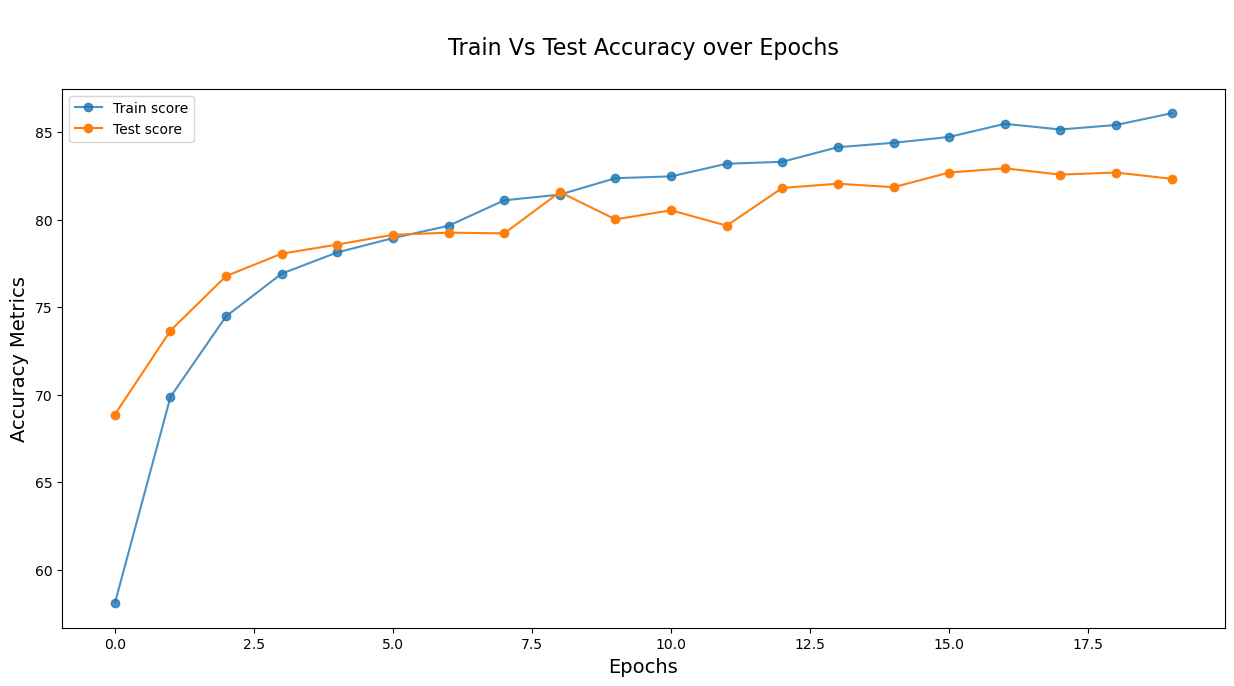

In [208]:
plt.figure(figsize=(15,7))
plt.plot([(t/(len(train_data)/100)) for t in train_acc], label='Train score',marker='o',alpha=0.8)
plt.plot([(t/(len(test_data)/100)) for t in test_acc], label='Test score',marker='o')
plt.title('\nTrain Vs Test Accuracy over Epochs\n',fontsize=16)
# plt.xticks(np.arange(0,20,1));
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Accuracy Metrics',fontsize=14)
plt.legend();

Text(0.5, 1.0, '\nTrain Vs Test Loss over Epochs\n')

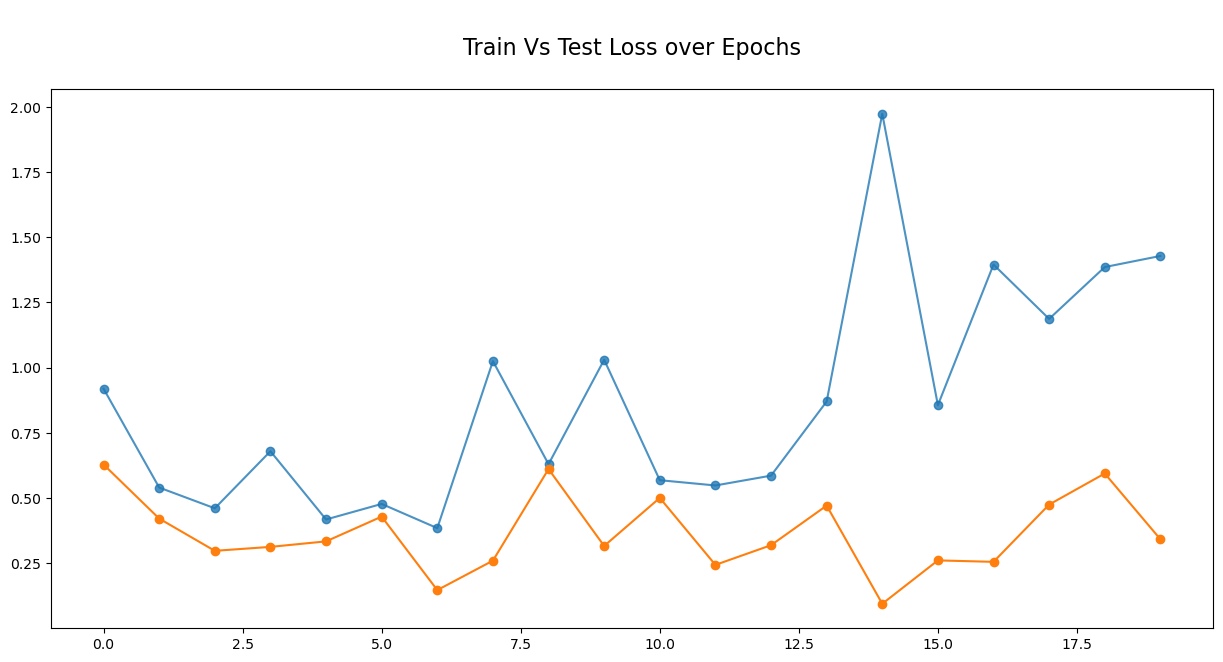

In [209]:
plt.figure(figsize=(15,7))
plt.plot([t.detach().numpy() for t in test_loss], label='Test Loss', marker='o', alpha=0.8)
plt.plot([t.detach().numpy() for t in train_loss], label='Train Loss', marker='o')
plt.title('\nTrain Vs Test Loss over Epochs\n', fontsize=16)
# Add additional plot formatting as needed
